In [1]:
import sys
#!{sys.executable} -m pip install sklearn
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib
import random
import os
from matplotlib import animation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy import spatial
from IPython.display import HTML
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct, ConstantKernel)

import importlib
import scripts.theodolite_function as tfu
import scripts.theodolite_utils as tfuu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R
import scripts.gp_prediction_utils as GPf
GPf = importlib.reload(GPf)
import GPy

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
# Switch values if necessary 1 11 2021
#Dist_prism_12 = 1.0398341231585624*1000
#Dist_prism_13 = 0.818424700118086*1000
#Dist_prism_23 = 0.8806156053859284*1000
#Dist_GPS_12 = 0.835637436093363*1000
#Dist_GPS_13 = 0.7812173648662254*1000
#Dist_GPS_23 = 0.5166745729506486*1000

# 26 11 2021
#Dist_prism_12 = 1.03688797895733
#Dist_prism_13 = 0.822536135483593
#Dist_prism_23 = 0.8783765747673403
#Dist_GPS_12 = 0.7828618536473139
#Dist_GPS_13 = 0.8394208131018045
#Dist_GPS_23 = 0.5176447366930409

# 31 01 2022
#Dist_prism_12 = 1.038854051807371
#Dist_prism_13 = 0.8202157646292075
#Dist_prism_23 = 0.879788333022114
#Dist_GPS_12 = 0.7830826912858335
#Dist_GPS_13 = 0.8418404054627937
#Dist_GPS_23 = 0.5172558618541933
     
# 03 02 2022
#Dist_prism_12 = 1.0403741344089559
#Dist_prism_13 = 0.8239475424257701
#Dist_prism_23 = 0.8766711748547112
#Dist_GPS_12 = 0.781661929058067
#Dist_GPS_13 = 0.8353981332464246
#Dist_GPS_23 = 0.5174987476948135

# 17 02 2022 / 24 02 2022
Dist_prism_12_240222 = 0.8882613537922258
Dist_prism_13_240222 = 0.8262903370535766
Dist_prism_23_240222 = 1.0377436460567973
Dist_GPS_12_240222 = 0.7809786915630756
Dist_GPS_13_240222 = 0.8378323585433202
Dist_GPS_23_240222 = 0.5191788936274444   

# 07 03 2022
Dist_prism_12_070322 = 0.8832836583456264
Dist_prism_13_070322 = 0.8247449387008166
Dist_prism_23_070322 = 1.039409793600046
Dist_GPS_12_070322 = 0.7781099344563802
Dist_GPS_13_070322 = 0.8431026980109139
Dist_GPS_23_070322 = 0.5157221841320069

# 12 03 2022
Dist_prism_12_120322 = 0.8860734460339026
Dist_prism_13_120322 = 0.8303896290142598
Dist_prism_23_120322 = 1.0393117663247973
Dist_GPS_12_120322 = 0.7829424296161074
Dist_GPS_13_120322 = 0.8415176433032493
Dist_GPS_23_120322 = 0.5161917038941966

# 14 03 2022 / 16 03 2022
Dist_prism_12_140322 = 0.8873171656784946
Dist_prism_13_140322 = 0.8272212117473343
Dist_prism_23_140322 = 1.0379270641796363
Dist_GPS_12_140322 = 0.7829081036179948
Dist_GPS_13_140322 = 0.8424633975958637
Dist_GPS_23_140322 = 0.5165807364575292

# 31 03 2022
Dist_prism_12_310322 = 0.8873171656784946
Dist_prism_13_310322 = 0.8272212117473343
Dist_prism_23_310322 = 1.0379270641796363
Dist_GPS_12_310322 = 0.7829081036179948
Dist_GPS_13_310322 = 0.8424633975958637
Dist_GPS_23_310322 = 0.5165807364575292

Inter_distance = [[Dist_prism_12_240222,Dist_prism_13_240222,Dist_prism_23_240222,Dist_GPS_12_240222,Dist_GPS_13_240222,Dist_GPS_23_240222],
                 [Dist_prism_12_070322,Dist_prism_13_070322,Dist_prism_23_070322,Dist_GPS_12_070322,Dist_GPS_13_070322,Dist_GPS_23_070322],
                 [Dist_prism_12_120322,Dist_prism_13_120322,Dist_prism_23_120322,Dist_GPS_12_120322,Dist_GPS_13_120322,Dist_GPS_23_120322],
                 [Dist_prism_12_140322,Dist_prism_13_140322,Dist_prism_23_140322,Dist_GPS_12_140322,Dist_GPS_13_140322,Dist_GPS_23_140322],
                 [Dist_prism_12_140322,Dist_prism_13_140322,Dist_prism_23_140322,Dist_GPS_12_140322,Dist_GPS_13_140322,Dist_GPS_23_140322],
                 [Dist_prism_12_310322,Dist_prism_13_310322,Dist_prism_23_310322,Dist_GPS_12_310322,Dist_GPS_13_310322,Dist_GPS_23_310322],]

print(Inter_distance[0])

[0.8882613537922258, 0.8262903370535766, 1.0377436460567973, 0.7809786915630756, 0.8378323585433202, 0.5191788936274444]


In [17]:
tfuu = importlib.reload(tfuu)
path = "./data/prediction/TS/20220331-2/"
index_prism = 5
prefix = "GP-10-20"
P1 = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_1.csv"))
P2 = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_2.csv"))
P3 = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_3.csv"))

dist_prism = []
origin = 0
#origin = min(P1[0,0],P2[0,0],P3[0,0])
for i in range(0,len(P1[:,0])):
    dp1 = abs(np.linalg.norm(P1[i,1:4]-P2[i,1:4])-Inter_distance[index_prism][0])*1000
    dp2 = abs(np.linalg.norm(P1[i,1:4]-P3[i,1:4])-Inter_distance[index_prism][1])*1000
    dp3 = abs(np.linalg.norm(P3[i,1:4]-P2[i,1:4])-Inter_distance[index_prism][2])*1000
    dist_prism.append(np.array([P1[i,0]-origin, dp1, dp2, dp3]))
dist_prism = np.array(dist_prism)

In [18]:
print(dist_prism[0])
print(dist_prism[:,0])

[1.64874001e+09 5.25172081e+01 1.48529366e+00 6.00227058e+01]
[1.64874001e+09 1.64874001e+09 1.64874001e+09 ... 1.64874145e+09
 1.64874145e+09 1.64874145e+09]


In [5]:
# Read rosbag of grand axe and show the trajectory
ttfu = importlib.reload(tfuu)

#file_name = './data/total_station/20220224/20220224_theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220307/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220312/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220314/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220316/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220331-1/theodolite_reference_prisms.txt'
file_name = './data/total_station/20220331-2/theodolite_reference_prisms.txt'

trimble_1, trimble_2, trimble_3, T_1_grand, T_2_grand, T_3_grand = tfu.read_marker_file(file_name, 1)

#file = "/home/norlab/Data/IROS_2022/20220224_TS/2022-02-24-15-34-38.bag"
#file = "/home/norlab/Data/IROS_2022/20220307_TS/2022-03-07-19-20-06.bag"
#file = "/home/norlab/Data/IROS_2022/20220312_TS/2022-03-12-09-45-12.bag"
#file = "/home/norlab/Data/IROS_2022/20220314_TS/2022-03-14-10-47-49.bag"
#file = "/home/norlab/Data/IROS_2022/20220316_TS/2022-03-16-19-02-42.bag"
#file = "/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-10-22-52.bag"  # Tree experiments
file = "/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-11-20-05.bag"


Tf = []
Tf.append(T_1_grand)
Tf.append(T_2_grand)
Tf.append(T_3_grand)
trajectory_trimble_1, trajectory_trimble_2, trajectory_trimble_3, time_trimble_1, time_trimble_2, time_trimble_3, distance_1, distance_2, distance_3 = ttfu.read_rosbag_theodolite_with_tf_more(file, Tf)
trimble_1 = np.array(trajectory_trimble_1).T
trimble_2 = np.array(trajectory_trimble_2).T
trimble_3 = np.array(trajectory_trimble_3).T

Number of data for theodolites: [1860 1929 2012]
Bad measures: 4622


<IPython.core.display.Javascript object>


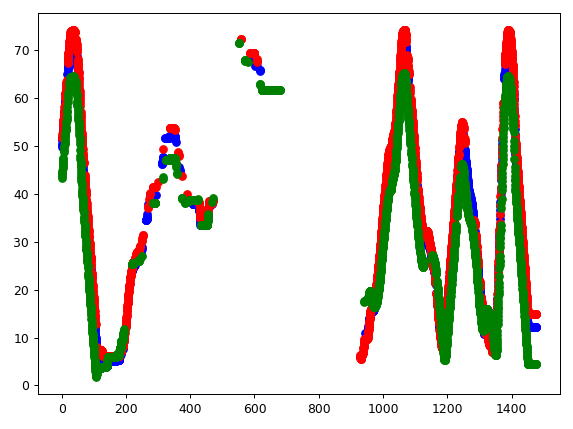

In [6]:
%matplotlib notebook
offset_timestamp = min(time_trimble_1[0],time_trimble_2[0],time_trimble_1[2])
#offset_timestamp = 0
plt.figure(0)
plt.scatter([(i-offset_timestamp) for i in time_trimble_1], distance_1, color='b')
plt.scatter([(i-offset_timestamp) for i in time_trimble_2], distance_2, color='r')
plt.scatter([(i-offset_timestamp) for i in time_trimble_3], distance_3, color='g')

In [7]:
tfuu = importlib.reload(tfuu)
error_arr = []
for i in dist_prism:
    index1 = tfuu.research_index_for_time(time_trimble_1, i[0], 0.5)
    index2 = tfuu.research_index_for_time(time_trimble_2, i[0], 0.5)
    index3 = tfuu.research_index_for_time(time_trimble_3, i[0], 0.5)
    dist1 = distance_1[index1]
    dist2 = distance_2[index2]
    dist3 = distance_3[index3]
    if(index1!=-1 and index2!=-1):
        error_arr.append([dist1, dist2, i[1]])
    if(index1!=-1 and index3!=-1):
        error_arr.append([dist1, dist3, i[2]])
    if(index2!=-1 and index3!=-1):
        error_arr.append([dist2, dist3, i[3]])

<IPython.core.display.Javascript object>


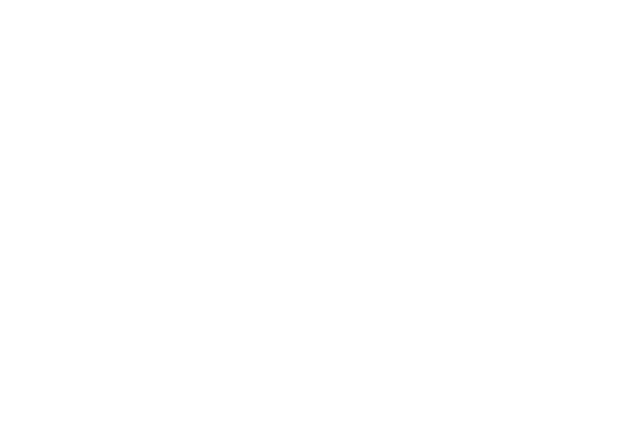

In [8]:
%matplotlib notebook
error_arr = np.array(error_arr)
fig, ax = plt.subplots(nrows=1, figsize=(7,5))
ax.scatter(error_arr[:,0], error_arr[:,2])
ax.scatter(error_arr[:,1], error_arr[:,2])
#ax.set_aspect('equal')
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


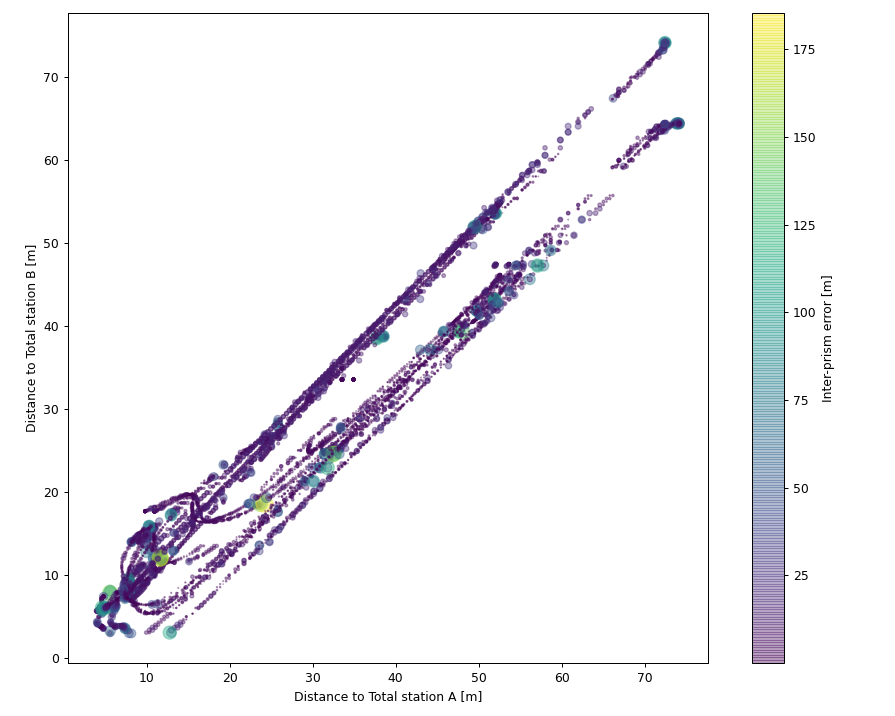

In [9]:
%matplotlib notebook
error_arr = np.array(error_arr)
fig, ax = plt.subplots(nrows=1, figsize=(10,8))
iti = [0,-1]
#sc = ax.scatter(error_arr[:,0], error_arr[:,1], s=error_arr[:,2],c=error_arr[:,2], cmap='viridis', alpha=0.4)
sc = ax.scatter(error_arr[iti[0]:iti[1],0], error_arr[iti[0]:iti[1],1], s=error_arr[iti[0]:iti[1],2],c=error_arr[iti[0]:iti[1],2], cmap='viridis', alpha=0.4)
ax.set_xlabel("Distance to Total station A [m]")
ax.set_ylabel("Distance to Total station B [m]")
ax.set_aspect('equal')
plt.colorbar(sc, label="Inter-prism error [m]")
fig.tight_layout()

file_pdf = "./figs/error_distance_20220331-2.pdf"
fig.savefig(file_pdf, bbox_inches='tight')
plt.show()

In [15]:
ttfu = importlib.reload(tfuu)

list_dataset_GP = ["./data/prediction/TS/20220224/", 
                   "./data/prediction/TS/20220307/", 
                   "./data/prediction/TS/20220312/",
                   "./data/prediction/TS/20220314/", 
                   "./data/prediction/TS/20220316/", 
                   "./data/prediction/TS/20220331-1/",
                   "./data/prediction/TS/20220331-2/"]

list_calib = ["./data/total_station/20220224/20220224_theodolite_reference_prisms.txt",
              "./data/total_station/20220307/theodolite_reference_prisms.txt",
              "./data/total_station/20220312/theodolite_reference_prisms.txt",
              "./data/total_station/20220314/theodolite_reference_prisms.txt",
              "./data/total_station/20220316/theodolite_reference_prisms.txt",
              "./data/total_station/20220331-1/theodolite_reference_prisms.txt",
              "./data/total_station/20220331-2/theodolite_reference_prisms.txt"]

list_rosbag = ["/home/norlab/Data/IROS_2022/20220224_TS/2022-02-24-15-34-38.bag",
               "/home/norlab/Data/IROS_2022/20220307_TS/2022-03-07-19-20-06.bag",
               "/home/norlab/Data/IROS_2022/20220312_TS/2022-03-12-09-45-12.bag",
               "/home/norlab/Data/IROS_2022/20220314_TS/2022-03-14-10-47-49.bag",
               "/home/norlab/Data/IROS_2022/20220316_TS/2022-03-16-19-02-42.bag",
               "/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-10-22-52.bag",
               "/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-11-20-05.bag"]

error_arr = []

for path,file_name,file,inter_error in zip(list_dataset_GP,list_calib,list_rosbag,Inter_distance):

    prefix = "GP-10-20"
    P1 = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_1.csv"))
    P2 = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_2.csv"))
    P3 = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_3.csv"))

    dist_prism = []
    origin = 0
    for i in range(0,len(P1[:,0])):
        dp1 = abs(np.linalg.norm(P1[i,1:4]-P2[i,1:4])-inter_error[0])*1000
        dp2 = abs(np.linalg.norm(P1[i,1:4]-P3[i,1:4])-inter_error[1])*1000
        dp3 = abs(np.linalg.norm(P3[i,1:4]-P2[i,1:4])-inter_error[2])*1000
        dist_prism.append(np.array([P1[i,0]-origin, dp1, dp2, dp3]))
    dist_prism = np.array(dist_prism)

    trimble_1, trimble_2, trimble_3, T_1_grand, T_2_grand, T_3_grand = tfu.read_marker_file(file_name, 1)

    Tf = []
    Tf.append(T_1_grand)
    Tf.append(T_2_grand)
    Tf.append(T_3_grand)
    trajectory_trimble_1, trajectory_trimble_2, trajectory_trimble_3, time_trimble_1, time_trimble_2, time_trimble_3, distance_1, distance_2, distance_3 = ttfu.read_rosbag_theodolite_with_tf_more(file, Tf)
    trimble_1 = np.array(trajectory_trimble_1).T
    trimble_2 = np.array(trajectory_trimble_2).T
    trimble_3 = np.array(trajectory_trimble_3).T

    for i in dist_prism:
        index1 = tfuu.research_index_for_time(time_trimble_1, i[0], 0.5)
        index2 = tfuu.research_index_for_time(time_trimble_2, i[0], 0.5)
        index3 = tfuu.research_index_for_time(time_trimble_3, i[0], 0.5)
        dist1 = distance_1[index1]
        dist2 = distance_2[index2]
        dist3 = distance_3[index3]
        if(index1!=-1 and index2!=-1):
            error_arr.append([dist1, dist2, i[1]])
        if(index1!=-1 and index3!=-1):
            error_arr.append([dist1, dist3, i[2]])
        if(index2!=-1 and index3!=-1):
            error_arr.append([dist2, dist3, i[3]])

Number of data for theodolites: [5277 4976 5037]
Bad measures: 558
Number of data for theodolites: [7833 7371 7640]
Bad measures: 556
Number of data for theodolites: [7785 7893 8312]
Bad measures: 658
Number of data for theodolites: [8038 7616 8011]
Bad measures: 704
Number of data for theodolites: [6094 5928 5779]
Bad measures: 459
Number of data for theodolites: [4972 4541 4758]
Bad measures: 3550


In [16]:
def plot_grid_speed_angular_result(dx, dy, mean_error_prisms_list, list_1, list_2, save_fig, name_file):
    method = 0
    min_error  = min(mean_error_prisms_list)
    max_error = max(mean_error_prisms_list)
    min_speed = min(list_1)
    max_speed = max(list_1)
    min_angular = min(list_2)
    max_angular = max(list_2)
    arr1 = np.array(list_1)
    arr2 = np.array(list_2) 
    mean_error_prisms_arr = np.array(mean_error_prisms_list)

    # generate 2 2d grids for the x & y bounds
    x, y = np.mgrid[slice(min_speed, max_speed + dx, dx),
                      slice(min_angular, max_angular + dy, dy)]

    sort_value_arr = np.zeros((2,x.shape[0],x.shape[1]))
    for i in range(0, len(arr1)):
        index_x = -1
        index_y = -1
        for j in range(0,len(x)-1):
            if(arr1[i]<x[j+1][0] and arr1[i]>=x[j][0]):
                index_x = j
                break
        for k in range(0,len(y[0])-1):
            if(arr2[i]<y[0][k+1] and arr2[i]>=y[0][k]):
                index_y = k
                break
        if(index_x != -1 and index_y != -1):
            if(method == 0):
                sort_value_arr[0, index_x, index_y] = sort_value_arr[0, index_x, index_y] + mean_error_prisms_arr[i]
                sort_value_arr[1, index_x, index_y] = sort_value_arr[1, index_x, index_y] + 1
            else:
                sort_value_arr[0, index_x, index_y] = max(sort_value_arr[0, index_x, index_y], mean_error_prisms_arr[i])
                sort_value_arr[1, index_x, index_y] = sort_value_arr[1, index_x, index_y]+1

        z = np.zeros((x.shape[0],x.shape[1]))
        for i in range(0,z.shape[0]):
            for j in range(0,z.shape[1]):
                if(sort_value_arr[1, i,j]!=0):
                    if(method == 0):
                        z[i,j]=sort_value_arr[0, i,j]/sort_value_arr[1, i,j]
                    else:
                        z[i,j]=sort_value_arr[0, i,j]
                #else:
                #        z[i,j]= 'nan'

    # x and y are bounds, so z should be the value *inside* those bounds.
    # Therefore, remove the last value from the z array.
    z = z[:-1, :-1]
    levels = MaxNLocator(nbins=10).tick_values(1, z.max())
    # pick the desired colormap, sensible levels, and define a normalization
    # instance which takes data values and translates those into levels.
    cmap = plt.get_cmap('inferno')
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

    fig, ax = plt.subplots(nrows=1, figsize=(8,6))
    im = ax.pcolormesh(x, y, z, norm=matplotlib.colors.LogNorm(vmin=1, vmax=np.max(z)), cmap=cmap)
    #im = ax.pcolormesh(x, y, z, cmap=cmap)
    fig.colorbar(im, ax=ax, label="Average inter-prism \nerror [mm]")
    ax.set_xlabel("Distance to Total station A [m]")
    ax.set_ylabel("Distance to Total station B [m]")
    ax.set_facecolor("silver") 
    plt.rc('font', size=10)

    fig.tight_layout()
    plt.show()
    if(save_fig):
        fig.savefig(name_file, bbox_inches='tight')

<IPython.core.display.Javascript object>


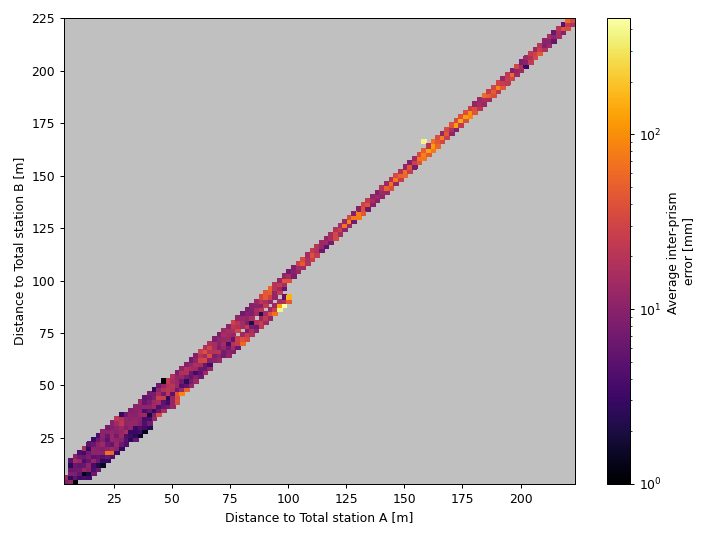

In [18]:
%matplotlib notebook
error_arr = np.array(error_arr)
list_1 = error_arr[:,0]
list_2 = error_arr[:,1]
mean_error_prisms_list = error_arr[:,2]
dx = 2
dy = 2
save = True
file_name = "./figs/error_distance_all_log.pdf"
plot_grid_speed_angular_result(dx, dy, mean_error_prisms_list, list_1, list_2, save, file_name)